In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print('Normal Transaction \n',(data.Class==0).value_counts())
print('------------------------------------')
print('Fraud Transaction \n', (data.Class==1).value_counts())

Normal Transaction 
 True     284315
False       492
Name: Class, dtype: int64
------------------------------------
Fraud Transaction 
 False    284315
True        492
Name: Class, dtype: int64


In [7]:
data.loc[data.Class==0, 'Normal']=1
data.loc[data.Class==1, 'Normal']=0

data.loc[data.Class==1, 'Fraud']=1
data.loc[data.Class==0, 'Fraud']=0

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Normal,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0,0.0


In [9]:
def Class(Class):
    normal_class = data[data['Normal']==1][Class].value_counts()
    fraud_class = data[data['Fraud']==1][Class].value_counts()
    df = pd.DataFrame([normal_class,fraud_class])
    df.index = ['Normal','Fraud']
    df.plot(kind='bar', stacked=False, figsize=(5,10))
    

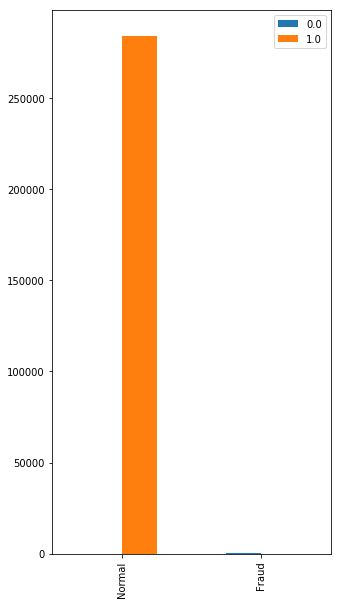

In [10]:
Class('Normal')

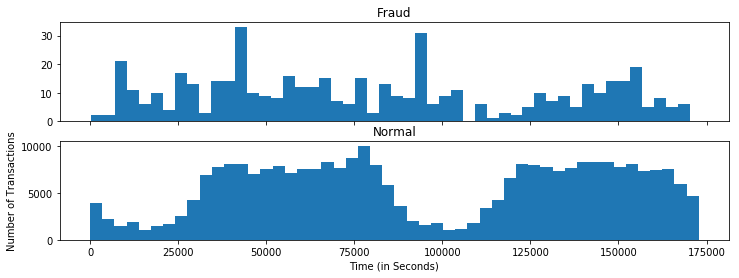

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(data.Time[data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data.Time[data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()


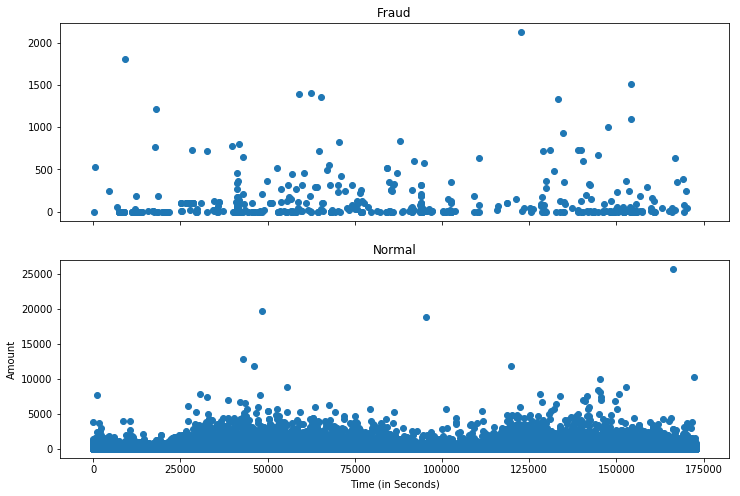

In [12]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(12,8))

bins=20
ax1.scatter(data.Time[data.Class==1], data.Amount[data.Class==1])
ax1.set_title('Fraud')

ax2.scatter(data.Time[data.Class == 0], data.Amount[data.Class==0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')

plt.show()

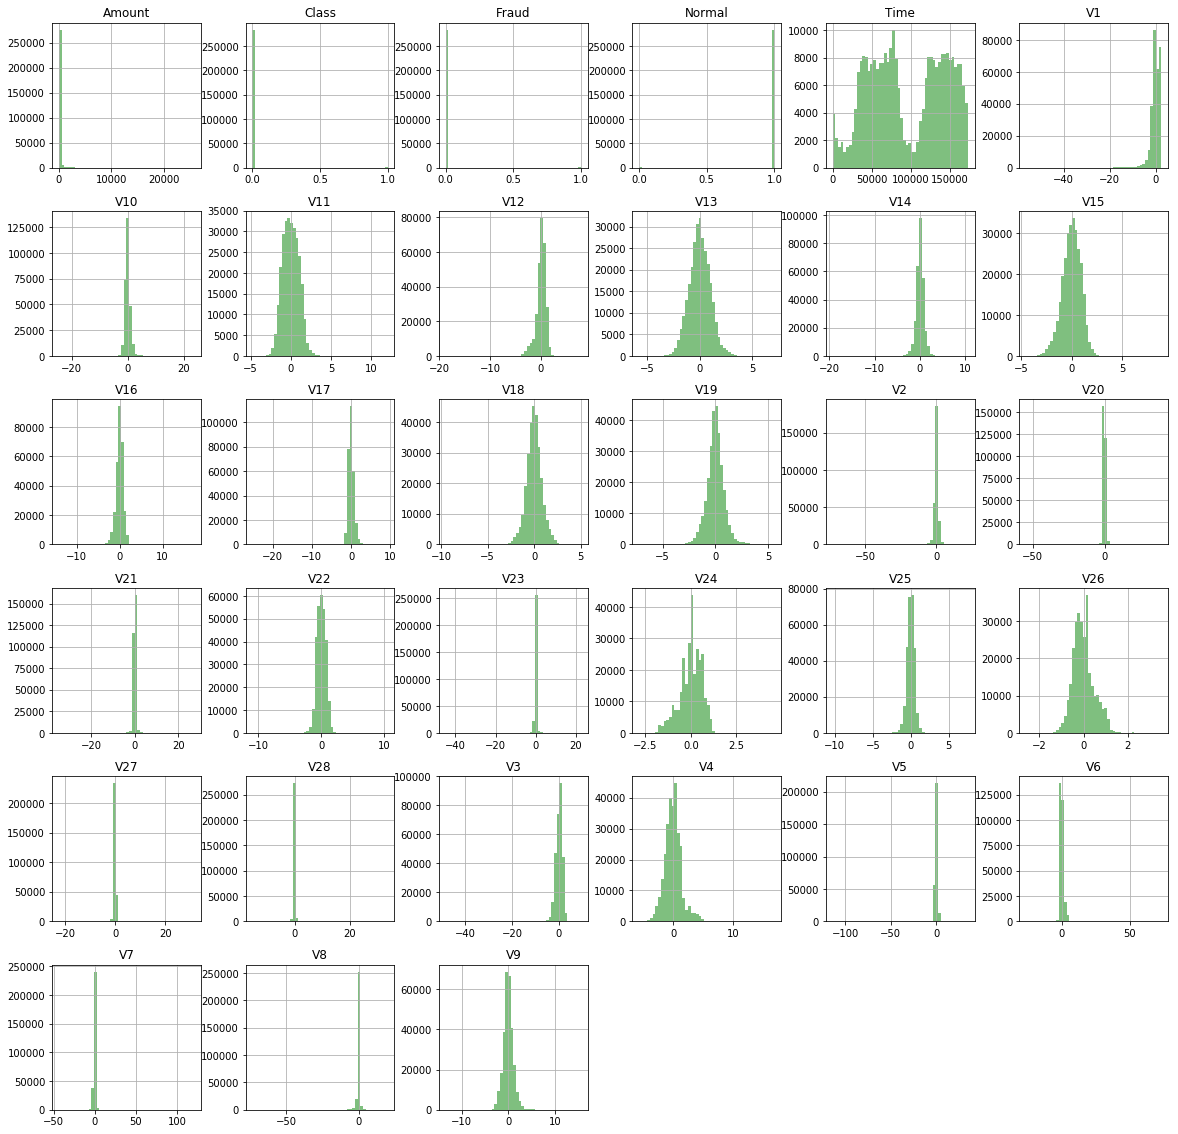

In [13]:
data.hist(figsize=(20,20), bins=50, color="green", alpha=0.5)
plt.show()

In [14]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Normal,Fraud
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,0.012323,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347,0.101347,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289,-0.091289,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961,0.192961,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447,-0.133447,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974,0.094974,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643,0.043643,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257,0.187257,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875,-0.019875,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733,0.097733,-0.097733


In [15]:
feat_labels = data.columns.values.tolist()

corr_list = []

for item in feat_labels:
    corr_list.append(data[item].corr(data['Class']))
    
    
corr_zipped = zip(feat_labels, corr_list)
corr_zipped = set(corr_zipped)

# Print the name and correlation of each feature in descending order
sorted(corr_zipped, key=lambda x: x[1])[::-1]

[('Fraud', 1.0),
 ('Class', 1.0),
 ('V11', 0.15487564474394733),
 ('V4', 0.13344748623900432),
 ('V2', 0.09128865034461915),
 ('V21', 0.040413380610575596),
 ('V19', 0.03478301303651474),
 ('V20', 0.020090324196975373),
 ('V8', 0.01987512391479436),
 ('V27', 0.017579728189513248),
 ('V28', 0.009536040916236166),
 ('Amount', 0.005631753006768537),
 ('V26', 0.004455397501283351),
 ('V25', 0.0033077055972996453),
 ('V22', 0.0008053175052984593),
 ('V23', -0.0026851557402506917),
 ('V15', -0.004223402267856671),
 ('V13', -0.004569778799461258),
 ('V24', -0.007220906715952716),
 ('Time', -0.012322570929245642),
 ('V6', -0.043643160699963775),
 ('V5', -0.09497429899144809),
 ('V9', -0.09773268607407871),
 ('V1', -0.10134729859508508),
 ('V18', -0.11148525388904093),
 ('V7', -0.18725659151429794),
 ('V3', -0.19296082706741327),
 ('V16', -0.1965389403040179),
 ('V10', -0.21688294364102725),
 ('V12', -0.26059292487721686),
 ('V14', -0.3025436958044044),
 ('V17', -0.3264810672437143),
 ('Normal'

In [16]:
from sklearn.preprocessing import RobustScaler
rob= RobustScaler()
data['scaled_time']=rob.fit_transform(data['Time'].values.reshape(-1,1))
data['scaled_amt']=rob.fit_transform(data['Amount'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,Normal,Fraud,scaled_time,scaled_amt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.0,0.0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.0,0.0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.0,0.0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.0,0.0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.0,0.0,-0.994960,0.670579


In [17]:
scaled_amount = data['scaled_amt']
scaled_time = data['scaled_time']

data.drop(['scaled_amt', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amt', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

data.head()

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,Normal,Fraud
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.0,0.0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.0,0.0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.0,0.0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.0,0.0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,1.0,0.0


In [18]:
data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head().sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0][:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Class,Normal,Fraud
239130,1.689373,0.766868,1.611613,-1.146542,-0.674573,-0.436261,-0.190973,1.236686,-0.762142,0.479800,...,-0.251125,0.368312,-1.382188,-1.039297,0.980283,-0.058904,-0.054202,0,1.0,0.0
58761,-0.293440,-0.424805,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,...,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136,1,0.0,1.0
280995,-0.181933,1.000693,-0.186965,1.220058,-0.876573,-0.541116,0.627163,-0.780556,0.582867,0.366847,...,-0.940716,0.145054,0.349871,-0.388893,0.129960,0.090527,0.018203,0,1.0,0.0
15736,1.089779,-0.675866,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,...,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,1,0.0,1.0
219025,-0.244673,0.668159,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,...,-0.706865,0.131405,0.600742,-0.604264,0.262938,0.099145,0.010810,1,0.0,1.0


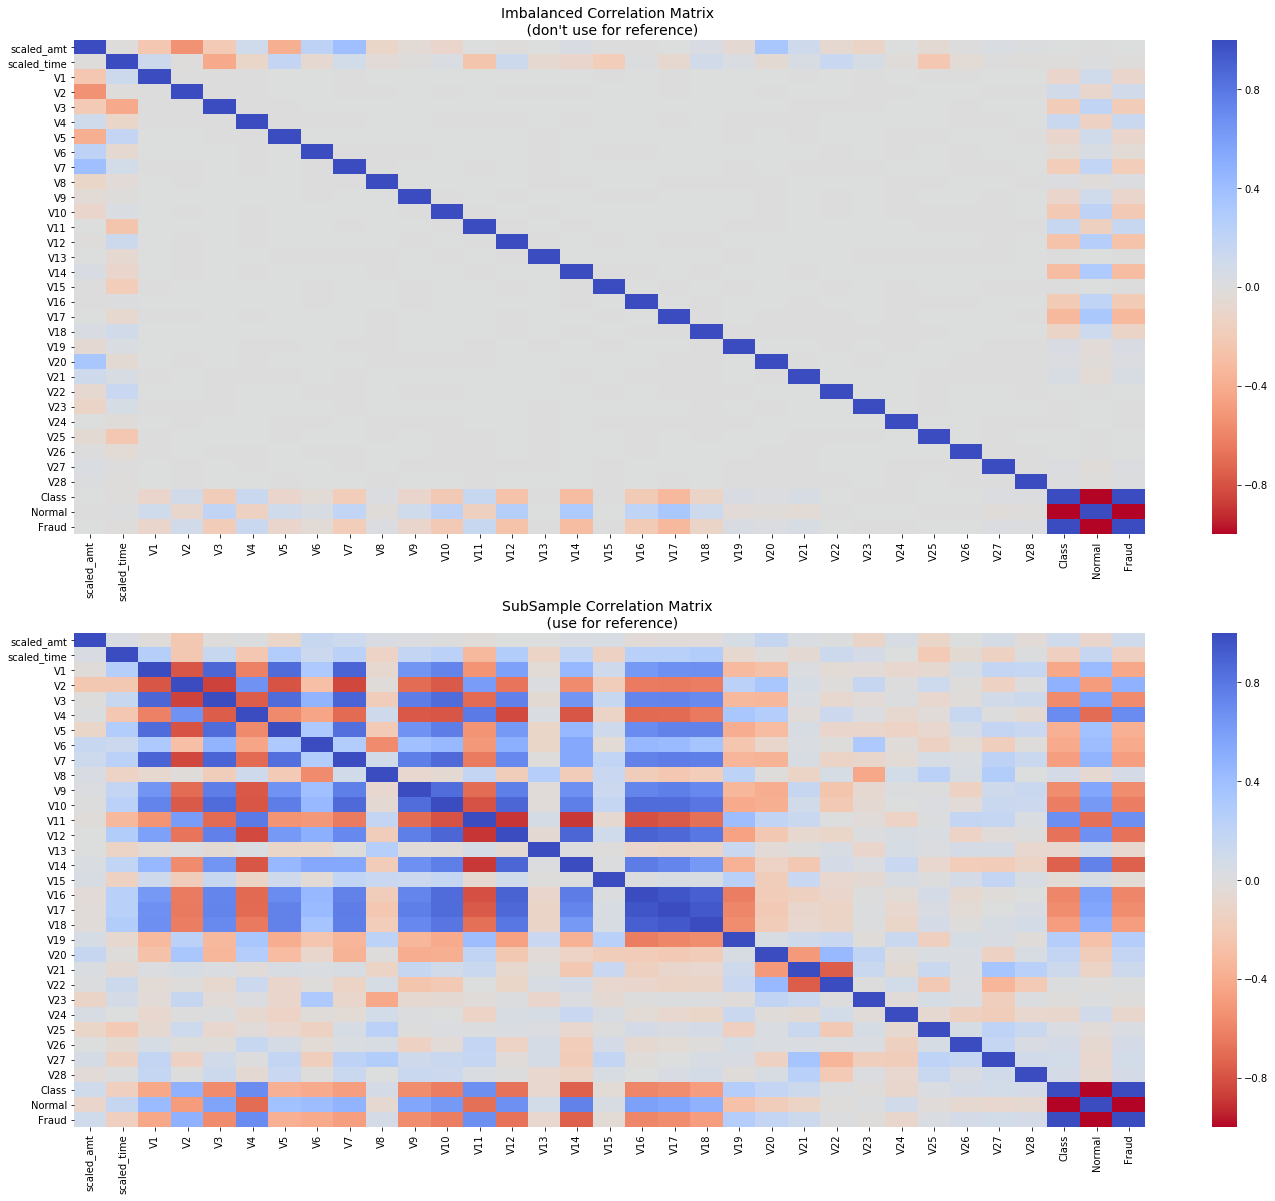

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = data.corr()
sb.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_data.corr()
sb.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [20]:
data.drop(['V2','V4','V8','V11','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1)

,scaled_amt,scaled_time,V1,V3,V5,V6,V7,V9,V10,V12,V14,V16,V17,V18,Class,Normal,Fraud
58481,-0.246769,-0.426286,-1.112670,1.664200,0.458121,0.803863,0.702509,-0.510092,2.651065,-0.353871,-0.062635,-0.193152,-0.308442,0.031910,0,1.0,0.0
250811,0.041780,0.826889,-0.066473,1.842314,-0.179755,-0.358913,0.314074,0.810201,-0.741747,0.551327,-0.772038,0.310881,-0.937304,0.246406,0,1.0,0.0
118122,-0.262139,-0.114358,-0.590602,2.439808,-0.695595,0.080229,0.061639,-0.544950,1.032231,0.026616,-0.426005,-0.494107,0.433590,0.015257,0,1.0,0.0
208867,-0.167819,0.618111,1.994318,-0.411836,-0.389100,-0.100753,-0.567768,1.264462,-0.211663,1.109130,-0.483520,0.072972,-0.640738,0.108460,0,1.0,0.0
520,-0.293440,-0.990449,1.213136,0.664599,-0.407416,-0.994125,0.180626,-0.216489,0.016012,1.049709,0.034876,0.039519,-0.455407,-0.358972,0,1.0,0.0
76258,-0.129253,-0.331442,-1.418397,1.017595,-0.612544,-0.089887,-0.709388,-0.343556,-0.583861,0.608834,0.076972,0.763096,-0.427661,0.564594,0,1.0,0.0
191937,-0.277091,0.526005,-0.547370,1.272245,0.475731,0.167561,0.570200,0.709614,-0.137705,-0.196662,-0.813168,0.382603,-1.041126,0.381613,0,1.0,0.0
263113,6.563264,0.894195,1.184050,-0.593697,-1.467996,0.759800,-0.826097,0.480463,0.355044,0.622201,-0.786127,-0.688050,-0.865006,2.118312,0,1.0,0.0
39856,1.383358,-0.525124,1.282092,0.571851,-1.685088,-0.633454,-0.828206,-1.624493,1.197196,0.032486,-0.882975,-0.871958,0.833882,-0.560685,0,1.0,0.0
195811,0.251520,0.546717,2.243348,-0.899991,-1.319990,-0.998235,-0.922162,-1.326643,1.545261,-0.452466,-0.490315,-0.715424,0.551264,-0.311425,0,1.0,0.0


In [21]:
data['V1_'] = data.V1.map(lambda x: 1 if x < -3 else 0)

data['V3_'] = data.V3.map(lambda x: 1 if x < -4 else 0)

data['V5_'] = data.V5.map(lambda x: 1 if x < -4.5 else 0)
data['V6_'] = data.V6.map(lambda x: 1 if x < -2.5 else 0)
data['V7_'] = data.V7.map(lambda x: 1 if x < -3 else 0)
data['V9_'] = data.V9.map(lambda x: 1 if x < -2 else 0)
data['V10_'] = data.V10.map(lambda x: 1 if x < -2.5 else 0)

data['V12_'] = data.V12.map(lambda x: 1 if x < -2 else 0)
data['V14_'] = data.V14.map(lambda x: 1 if x < -2.5 else 0)
data['V16_'] = data.V16.map(lambda x: 1 if x < -2 else 0)
data['V17_'] = data.V17.map(lambda x: 1 if x < -2 else 0)
data['V18_'] = data.V18.map(lambda x: 1 if x < -2 else 0)


In [22]:
data.head()

,scaled_amt,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V5_,V6_,V7_,V9_,V10_,V12_,V14_,V16_,V17_,V18_
58481,-0.246769,-0.426286,-1.112670,1.884517,1.664200,2.230076,0.458121,0.803863,0.702509,-0.013626,...,0,0,0,0,0,0,0,0,0,0
250811,0.041780,0.826889,-0.066473,0.249195,1.842314,-0.540464,-0.179755,-0.358913,0.314074,-0.161747,...,0,0,0,0,0,0,0,0,0,0
118122,-0.262139,-0.114358,-0.590602,1.372083,2.439808,3.078687,-0.695595,0.080229,0.061639,0.180952,...,0,0,0,0,0,0,0,0,0,0
208867,-0.167819,0.618111,1.994318,-0.322401,-0.411836,0.378577,-0.389100,-0.100753,-0.567768,-0.036419,...,0,0,0,0,0,0,0,0,0,0
520,-0.293440,-0.990449,1.213136,0.462143,0.664599,1.301135,-0.407416,-0.994125,0.180626,-0.279035,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split, cross_val_predict

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [24]:
X=data.drop(['Fraud'],axis=1)
y=data['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=23)

In [25]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
predict=Log_reg.predict(X_test)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [26]:
pred = cross_val_predict(Log_reg, X_train, y_train, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, pred))
print(confusion_matrix(y_test, predict))

[[199037      0]
 [     0    327]]
[[85278     0]
 [    0   165]]


In [28]:
from sklearn.metrics import precision_score, recall_score,f1_score, precision_recall_curve

print('Precision_score',precision_score(y_train, pred))
print('Recall_score', recall_score(y_train, pred))
print('F1_score', f1_score(y_test, predict))


Precision_score 1.0
Recall_score 1.0
F1_score 1.0


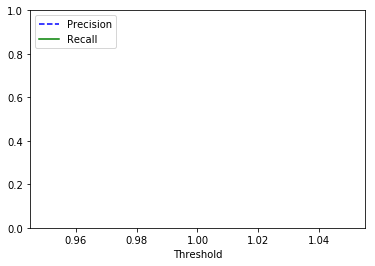

In [29]:
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()



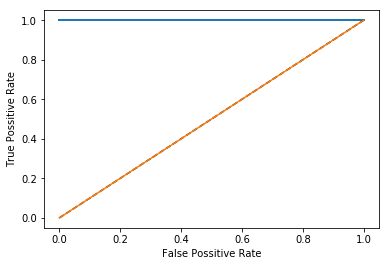

roc_curve 1.0


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_train, pred)

def roc_curve_(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot([0,1],[0,1])
    plt.xlabel('False Possitive Rate')
    plt.ylabel('True Possitive Rate')
    
roc_curve_(fpr, tpr)
plt.show()

print('roc_curve',roc_auc_score(y_train, pred))

In [31]:
from sklearn.ensemble import RandomForestClassifier
rforr = RandomForestClassifier(random_state=23)
proba_for=cross_val_predict(rforr, X_train, y_train, cv=3, method='predict_proba')

y_score_prob = proba_for[:,1]
fpr_forest, tpr_forest, threshold = roc_curve(y_train, y_score_prob)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:638: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


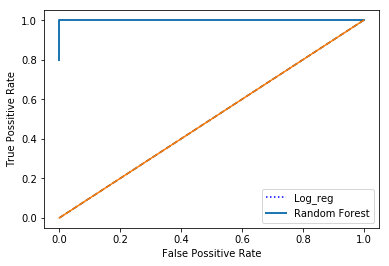

In [32]:
plt.plot(fpr, tpr, "b:", label="Log_reg")
roc_curve_(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()
 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1, weights='distance')
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict_knn)

0.9994850368081645

In [41]:
from sklearn.metrics import mean_squared_error
fraud_pred = Log_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, fraud_pred)
lin_mse

0.0

In [44]:
rforr.fit(X_train, y_train)
fraud_prediction_rforr= rforr.predict(X_test)
rforr_mse = mean_squared_error(y_test, fraud_prediction_rforr)
rforr_mse

0.0

In [46]:
import tensorflow as tf
from sklearn.linear_model import Perceptron

In [47]:
perceptron = Perceptron(random_state=23)
perceptron.fit(X_train, y_train)
pred_percep = perceptron.predict(X_test)
pred_percep

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
accuracy_score(y_test, pred_percep)

0.9999180740376625

In [52]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

feature_col=tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns= feature_col)
dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a5071bba8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/jt/3p4j5xhd4w12hwqrdkmxzmqr0000gn/T/tmpxc68ovre'}
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:C

INFO:tensorflow:global_step/sec: 411.233
INFO:tensorflow:loss = 0.0010742564, step = 6301 (0.243 sec)
INFO:tensorflow:global_step/sec: 426.628
INFO:tensorflow:loss = 6.8937734e-05, step = 6401 (0.235 sec)
INFO:tensorflow:global_step/sec: 420.794
INFO:tensorflow:loss = 0.00015917272, step = 6501 (0.238 sec)
INFO:tensorflow:global_step/sec: 421.351
INFO:tensorflow:loss = 2.1008971e-05, step = 6601 (0.238 sec)
INFO:tensorflow:global_step/sec: 292.008
INFO:tensorflow:loss = 0.0079261195, step = 6701 (0.342 sec)
INFO:tensorflow:global_step/sec: 358.921
INFO:tensorflow:loss = 0.00011167396, step = 6801 (0.279 sec)
INFO:tensorflow:global_step/sec: 404.358
INFO:tensorflow:loss = 6.325379e-05, step = 6901 (0.248 sec)
INFO:tensorflow:global_step/sec: 288.973
INFO:tensorflow:loss = 9.879072e-05, step = 7001 (0.346 sec)
INFO:tensorflow:global_step/sec: 357.37
INFO:tensorflow:loss = 9.192615e-05, step = 7101 (0.280 sec)
INFO:tensorflow:global_step/sec: 397.572
INFO:tensorflow:loss = 5.95347e-05, st

INFO:tensorflow:global_step/sec: 430.031
INFO:tensorflow:loss = 1.1303285e-05, step = 14301 (0.232 sec)
INFO:tensorflow:global_step/sec: 440.126
INFO:tensorflow:loss = 1.0111224e-05, step = 14401 (0.227 sec)
INFO:tensorflow:global_step/sec: 410.322
INFO:tensorflow:loss = 7.886821e-06, step = 14501 (0.243 sec)
INFO:tensorflow:global_step/sec: 445.238
INFO:tensorflow:loss = 1.2604798e-05, step = 14601 (0.225 sec)
INFO:tensorflow:global_step/sec: 427.356
INFO:tensorflow:loss = 1.3896986e-05, step = 14701 (0.235 sec)
INFO:tensorflow:global_step/sec: 426.912
INFO:tensorflow:loss = 1.1672815e-05, step = 14801 (0.234 sec)
INFO:tensorflow:global_step/sec: 437.56
INFO:tensorflow:loss = 2.570964e-05, step = 14901 (0.229 sec)
INFO:tensorflow:global_step/sec: 416.641
INFO:tensorflow:loss = 1.1689315e-05, step = 15001 (0.240 sec)
INFO:tensorflow:global_step/sec: 437.602
INFO:tensorflow:loss = 0.0011258356, step = 15101 (0.229 sec)
INFO:tensorflow:global_step/sec: 441.122
INFO:tensorflow:loss = 5.71

INFO:tensorflow:loss = 1.8429724e-06, step = 22201 (0.224 sec)
INFO:tensorflow:global_step/sec: 368.32
INFO:tensorflow:loss = 8.961835e-06, step = 22301 (0.272 sec)
INFO:tensorflow:global_step/sec: 312.397
INFO:tensorflow:loss = 7.402724e-06, step = 22401 (0.320 sec)
INFO:tensorflow:global_step/sec: 404.796
INFO:tensorflow:loss = 1.2170748e-05, step = 22501 (0.247 sec)
INFO:tensorflow:global_step/sec: 396.19
INFO:tensorflow:loss = 7.3861565e-06, step = 22601 (0.252 sec)
INFO:tensorflow:global_step/sec: 411.895
INFO:tensorflow:loss = 6.18927e-06, step = 22701 (0.243 sec)
INFO:tensorflow:global_step/sec: 413.001
INFO:tensorflow:loss = 7.207328e-06, step = 22801 (0.243 sec)
INFO:tensorflow:global_step/sec: 408.387
INFO:tensorflow:loss = 7.936874e-06, step = 22901 (0.244 sec)
INFO:tensorflow:global_step/sec: 422.151
INFO:tensorflow:loss = 9.133654e-06, step = 23001 (0.238 sec)
INFO:tensorflow:global_step/sec: 400.633
INFO:tensorflow:loss = 6.3705e-06, step = 23101 (0.249 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 378.502
INFO:tensorflow:loss = 0.0003396045, step = 30201 (0.264 sec)
INFO:tensorflow:global_step/sec: 414.501
INFO:tensorflow:loss = 4.1794606e-06, step = 30301 (0.241 sec)
INFO:tensorflow:global_step/sec: 393.543
INFO:tensorflow:loss = 2.3174207e-06, step = 30401 (0.255 sec)
INFO:tensorflow:global_step/sec: 412.089
INFO:tensorflow:loss = 7.288144e-06, step = 30501 (0.242 sec)
INFO:tensorflow:global_step/sec: 430.785
INFO:tensorflow:loss = 3.8337535e-06, step = 30601 (0.232 sec)
INFO:tensorflow:global_step/sec: 427.875
INFO:tensorflow:loss = 2.1862904e-06, step = 30701 (0.233 sec)
INFO:tensorflow:global_step/sec: 424.165
INFO:tensorflow:loss = 3.3330691e-06, step = 30801 (0.236 sec)
INFO:tensorflow:global_step/sec: 440.795
INFO:tensorflow:loss = 3.5548014e-06, step = 30901 (0.227 sec)
INFO:tensorflow:global_step/sec: 413.46
INFO:tensorflow:loss = 3.776531e-06, step = 31001 (0.242 sec)
INFO:tensorflow:global_step/sec: 437.411
INFO:tensorflow:loss = 3.30

INFO:tensorflow:loss = 2.0480113e-06, step = 38101 (0.228 sec)
INFO:tensorflow:global_step/sec: 397.588
INFO:tensorflow:loss = 2.238745e-06, step = 38201 (0.252 sec)
INFO:tensorflow:global_step/sec: 439.138
INFO:tensorflow:loss = 2.899156e-06, step = 38301 (0.228 sec)
INFO:tensorflow:global_step/sec: 419.955
INFO:tensorflow:loss = 1.5830963e-06, step = 38401 (0.238 sec)
INFO:tensorflow:global_step/sec: 431.404
INFO:tensorflow:loss = 2.3007303e-06, step = 38501 (0.232 sec)
INFO:tensorflow:global_step/sec: 433.751
INFO:tensorflow:loss = 1.5473339e-06, step = 38601 (0.230 sec)
INFO:tensorflow:global_step/sec: 414.298
INFO:tensorflow:loss = 1.6236279e-06, step = 38701 (0.241 sec)
INFO:tensorflow:global_step/sec: 420.046
INFO:tensorflow:loss = 3.0111742e-06, step = 38801 (0.238 sec)
INFO:tensorflow:global_step/sec: 421.328
INFO:tensorflow:loss = 1.7309156e-06, step = 38901 (0.238 sec)
INFO:tensorflow:global_step/sec: 421.174
INFO:tensorflow:loss = 1.3279891e-06, step = 39001 (0.237 sec)
INF

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1a50d693c8>, 'hidden_units': [300, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=44, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x1a288f9d08>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [53]:
dnn_clf.evaluate(X_test, y_test)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Starting evaluation at 2018-11-10-14:09:31
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/jt/3p4j5xhd4w12hwqrdkmxzmqr0000gn/T/tmpxc68ovre/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-10-14:09:33
INFO:tensorflow:Saving dict for gl

{'accuracy': 0.99994147, 'global_step': 40000, 'loss': 0.00020924691}